# Loading the dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import collections
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt


In [ ]:
        
stopwords = set(line.strip() for line in open('../input/stopwords/stopwords.txt'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))
df = pd.read_csv("/kaggle/input/tinder-google-play-store-review/tinder_google_play_reviews.csv")

def remove_duplicates(frase):
    frase = frase.split(" ")
    UniqW = Counter(frase)
    return " ".join(UniqW.keys())

# Top 30's most common words for bad reviews

1. Get every content with respect to a score == 1
2. Get all words from this contents
3. Remove duplicated words
4. For each word remove if it does not matter
5. Add to a dictionary
6. Print 30+ commons

Updates TODO: remove some others words like "it's", "i'm"... this kind of common words that doesnt mean anything

100%|██████████| 197571/197571 [00:12<00:00, 15570.24it/s]


account :  22055
banned :  20475
can't :  19439
time :  18845
people :  18172
don't :  17010
matches :  14958
money :  14827
log :  14699
it's :  14001
facebook :  13141
reason :  11822
fake :  11665
pay :  11634
match :  10105
won't :  10040
waste :  9635
i'm :  9619
phone :  9343
profile :  9003
profiles :  8561
doesn't :  8378
fix :  8248
please :  7789
try :  7744
tried :  7412
update :  7183
likes :  7108
login :  7078
worst :  7036


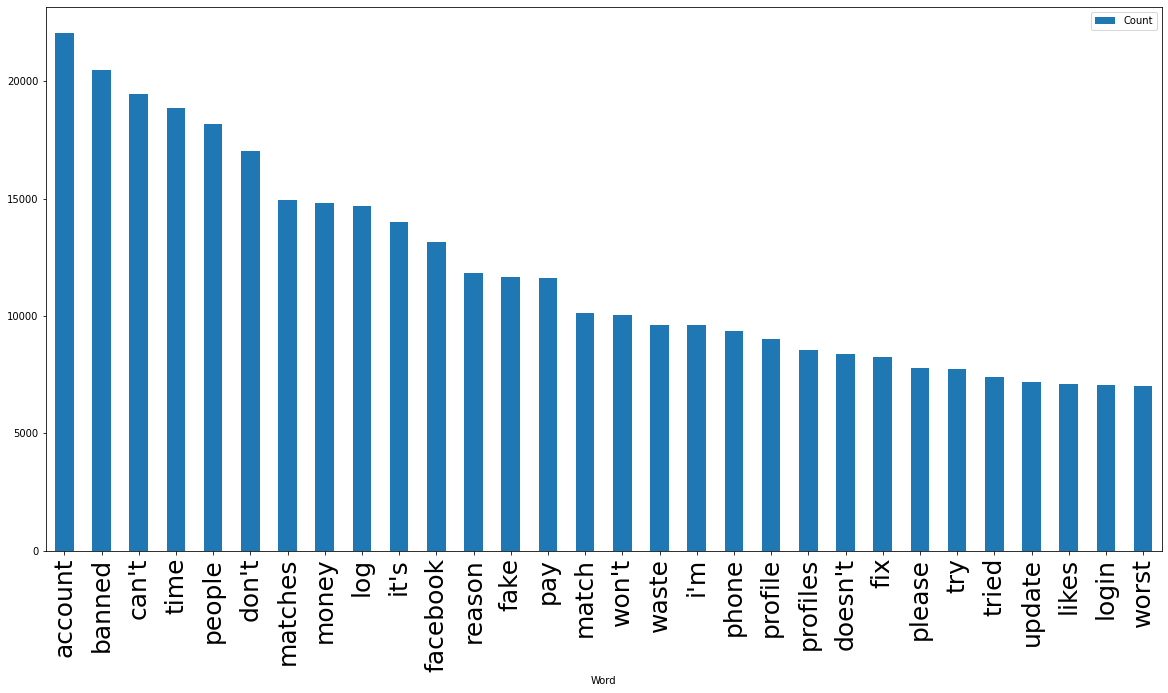

In [2]:
wordcount = {}

runs = 0

numbers = [str(i) for i in range(0, 100)]

for frase in tqdm(df[df["score"] == 1].content.values.tolist()):
    try:
        words = frase.split()
    except AttributeError:
        continue
    frase = remove_duplicates(frase)
        
#     print(words)
    for word in frase.lower().split():
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("?","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        
        if word == "": continue
        if word in numbers: continue
            
        if word not in stopwords:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1
                
ignore = ['app', 'tinder']
n_print = 30 + len(ignore)
most_commons = []
value_commons = []
word_counter = collections.Counter(wordcount)

for word, count in word_counter.most_common(n_print):
    if word in ignore: continue
    print(word, ": ", count)
    most_commons.append(word)
    value_commons.append(count)

to_df = {"Word" : most_commons, "Count": value_commons}
df = pd.DataFrame(to_df, columns = ['Word', 'Count'])

fig, ax = plt.subplots(1, 1)
df.plot.bar(x='Word',y='Count', figsize = (20, 10), ax=ax)
ax.tick_params(axis='x', labelsize=25)

**Some conclusions:**
*     People get their account banned very often and get mad.
*     People complaining about money cost
*     People rather be on facebook
*     People think that other people's profile are fake
*     People complaining about bugs (in login, or in likes)

# Get 10 last reasons of "FAKE" word being said

In [3]:
wordcount = {}

runs = 0

numbers = [str(i) for i in range(0, 100)]
df = pd.read_csv("/kaggle/input/tinder-google-play-store-review/tinder_google_play_reviews.csv")
for frase in tqdm(df[df["score"] == 1].content.values.tolist()):
    try:
        words = frase.split()
    except AttributeError:
        continue
    if 'fake' in words:
        print(frase)
        print("\n")
        if runs == 10:
            break
        else:
            runs += 1
        
        
    for word in frase.lower().split():
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("?","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        
        if word == "": continue
        if word in numbers: continue
            
        if word not in stopwords:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1

  0%|          | 329/197571 [00:00<00:19, 10095.52it/s]

I was banned from the app. Apparently for no reason. It's really unreasonable. They didn't even notify me why and this is very unethical of the creators.If you don't know how to make system and codes that executive things properly just give up on this and go find other job.How can you make people feel bad when it is supposed bring happiness?What are you doing?Are you just doing anything according to just one person's pont of view?Or am I banned without even a fake report?How irresponsible!!


The app is mainly a scam with a glimmer of hope a real user matches to you. I've even spoken to a few sexy women who tried and got nothing but fake profiles as matches. In more desirable than 4 years ago according to many others and I get 0 matches in 6 months where as before I would get 2 a week or so. The app is designed to dig into your pockets and to reduce your morale with the fake accounts.


Waste of time. You get matched with more fake spam profile than anything. Nothing but a money pit.



Even in the "fake" filter, many bans complains

# Now lets check the good reviews also and the 30's most common words

1. Get every content with respect to a score == 5
2. Get all words from this contents
3. Remove duplicated words
4. For each word remove if it does not matter
5. Add to a dictionary
6. Print 30+ commons

100%|██████████| 185892/185892 [00:03<00:00, 48985.64it/s]


nice :  16074
love :  12234
people :  11763
it's :  10248
awesome :  8427
fun :  6732
cool :  6449
meet :  6423
easy :  5542
dating :  4129
met :  3797
amazing :  3683
friends :  3067
time :  2587
ok :  2413
excellent :  2225
match :  2175
found :  2107
i'm :  2084
pretty :  2058
apps :  1899
meeting :  1843
matches :  1808
thanks :  1783
don't :  1744
lot :  1739
super :  1671
life :  1655
i've :  1623
free :  1599


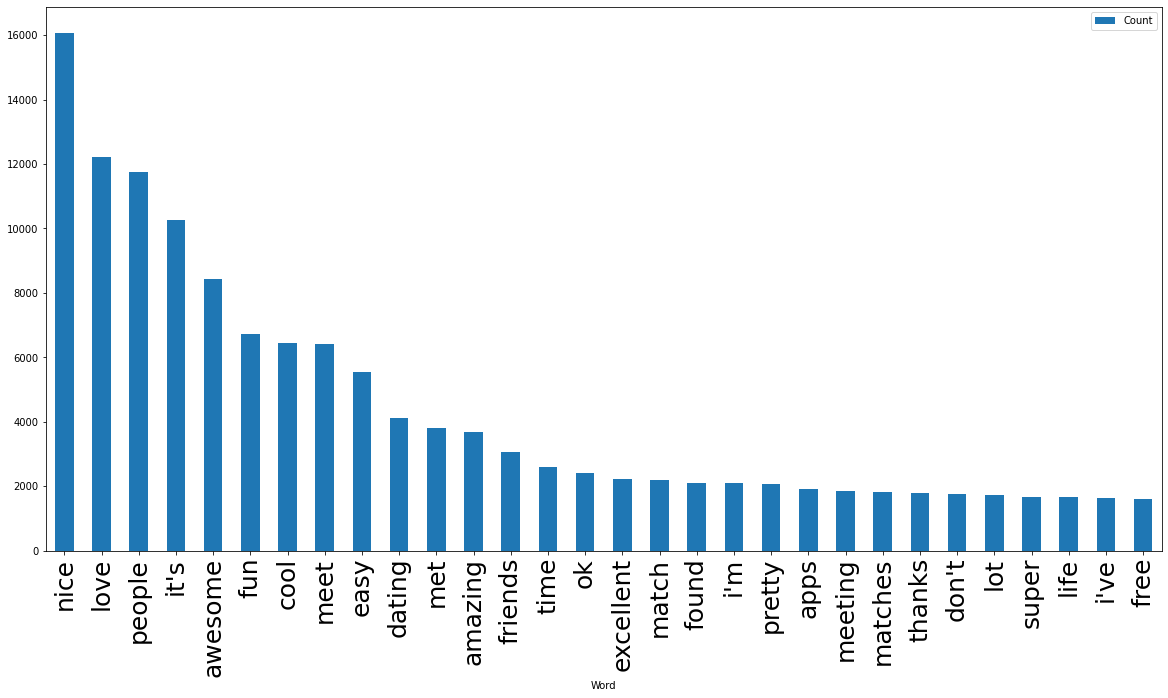

In [4]:
wordcount = {}
runs = 0
numbers = [str(i) for i in range(0, 100)]

df = pd.read_csv("/kaggle/input/tinder-google-play-store-review/tinder_google_play_reviews.csv")

for frase in tqdm(df[df["score"] == 5].content.values.tolist()):
    try:
        words = frase.split()
    except AttributeError:
        continue
    frase = remove_duplicates(frase)
        
#     print(words)
    for word in frase.lower().split():
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("?","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        
        if word == "": continue
        if word in numbers: continue
            
        if word not in stopwords:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1
            
n_print = 30 + len(ignore)
most_commons = []
value_commons = []
word_counter = collections.Counter(wordcount)

for word, count in word_counter.most_common(n_print):
    if word in ignore: continue
    print(word, ": ", count)
    most_commons.append(word)
    value_commons.append(count)

to_df = {"Word" : most_commons, "Count": value_commons}
df = pd.DataFrame(to_df, columns = ['Word', 'Count'])

fig, ax = plt.subplots(1, 1)
df.plot.bar(x='Word',y='Count', figsize = (20, 10), ax=ax)
ax.tick_params(axis='x', labelsize=25)

Not really surprisingly, people find a nice app to find love, have some fun and meet new people. People like the fact there is a free app and excelent to find friends too.